	 Pic1-Encrypted vs. Pic1-Decrypted


<Figure size 432x288 with 0 Axes>

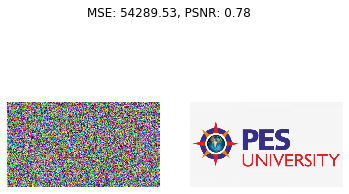

	 Pic2-Encrypted vs. Pic2-Decrypted


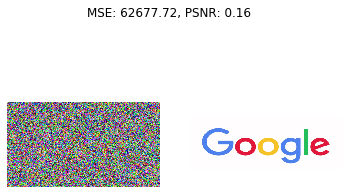

	 Pic3-Encrypted vs. Pic3-Decrypted


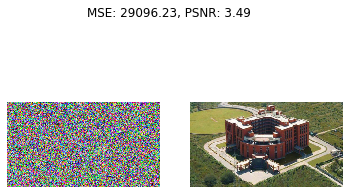

In [1]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
from math import log10, sqrt
import cv2

def error(imageA, imageB):
    #MSE
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # PSNR
    if(err == 0):  psnr = 100
    else:
        max_pixel = 255.0
        psnr = 20 * log10(max_pixel / sqrt(err)) 
    
    return err,psnr

def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = error(imageA, imageB)[0]
    s = error(imageA, imageB)[1]
    # setup the figure
    fig = plt.figure(title)
    print('\t',title)
    plt.suptitle("MSE: %.2f, PSNR: %.2f" % (m, s))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    # show the images
    plt.show()
    fig.savefig('MSE_PSNR_RESULTS/mse_psnr'+title+'.png')

# Read the image (default : BGR)
p1_e = cv2.imread("Encrypted_Images/encrypt1.png") 
p1_d = cv2.imread("Decrypted_Images/decrypt1.png")
p2_e = cv2.imread("Encrypted_Images/encrypt2.png")
p2_d = cv2.imread("Decrypted_Images/decrypt2.png")
p3_e = cv2.imread("Encrypted_Images/encrypt3.png")
p3_d = cv2.imread("Decrypted_Images/decrypt3.png")

# convert the images to rgb
p1_e = cv2.cvtColor(p1_e, cv2.COLOR_BGR2RGB)
p1_d = cv2.cvtColor(p1_d, cv2.COLOR_BGR2RGB)
p2_e = cv2.cvtColor(p2_e, cv2.COLOR_BGR2RGB)
p2_d = cv2.cvtColor(p2_d, cv2.COLOR_BGR2RGB)
p3_e = cv2.cvtColor(p3_e, cv2.COLOR_BGR2RGB)
p3_d = cv2.cvtColor(p3_d, cv2.COLOR_BGR2RGB)

# initialize the figure
fig = plt.figure("Images")
images = ("Pic1-Encrypted", p1_e), ("Pic1-Decrypted", p1_d), ("Pic2-Encrypted", p2_e), ("Pic2-Decrypted", p2_d), ("Pic3-Encrypted", p3_e),("Pic3-Decrypted", p3_d)

# loop over the images
# for (i, (name, image)) in enumerate(images):
#     # show the image
#     ax = fig.add_subplot(1, 6, i + 1)
#     ax.set_title(name)
#     plt.imshow(image, cmap = plt.cm.gray)
#     plt.axis("off")
# # show the figure
# plt.show()

# compare the images
compare_images(p1_e, p1_d, "Pic1-Encrypted vs. Pic1-Decrypted")
compare_images(p2_e, p2_d, "Pic2-Encrypted vs. Pic2-Decrypted")
compare_images(p3_e, p3_d, "Pic3-Encrypted vs. Pic3-Decrypted")